# Pressure-temperature phase diagram


In [1]:
from pyiron_atomistics import Project
import os
import numpy as np
import matplotlib.pyplot as plt

/home/menon/miniconda3/envs/workshop/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [ ]:
pr = Project("18")

There are two sets of inputs here, for quick testing you can use the fast setup. For the paper I would use the second set.

### Fast input

In [3]:
n_eq = 25000 #equilibriation steps
n_int = 50000 #integration steps
n_iter = 1 #number of independent calculations 
N = 7 # system size NxNxN

### Better input

In [ ]:
n_eq = 25000
n_int = 100000
n_iter = 3
N = 10

This is a fit function from the EAM data, one could use it to get an approximate value of Tm at various pressures

In [4]:
ff = np.poly1d([ 49.0026738 , 903.18716578])

For example at 5 GPa

In [5]:
np.polyval(ff, 5)

1148.20053478

In [7]:
pr = Project('pt')

In [8]:
temp = [1000, 1300]
press = 70000 #note that pressure is in bars

job = pr.create.job.Calphy(f'fcc_{temp[0]}_{press}', 
                           delete_aborted_job=True, 
                           delete_existing_job=True)
structure = pr.create.structure.bulk("Al", cubic=True).repeat(N)
job.structure = structure
job.potential = 'AlLi-atomicrex'
job.server.cores = 4 #add cores as needed
#job.server.queue = "s_cmfe"
job.calc_free_energy(temperature=temp, 
                     pressure=press,
                     n_equilibration_steps=n_eq, 
                     n_switching_steps=n_int,
                     n_iterations=n_iter,
                     reference_phase="solid")
job.run()

#lqd job
job = pr.create.job.Calphy(f'lqd_{temp[0]}_{press}', 
                           delete_aborted_job=True, 
                           delete_existing_job=True)
structure = pr.create.structure.bulk("Al", cubic=True).repeat(N)
job.structure = structure
job.potential = 'AlLi-atomicrex'
job.server.cores = 4 #add cores as needed
#job.server.queue = "s_cmfe"
job.calc_free_energy(temperature=temp, 
                     pressure=press,
                     n_equilibration_steps=n_eq, 
                     n_switching_steps=n_int,
                     n_iterations=n_iter,
                     reference_phase="liquid")
job.run()

The job fcc_1000_70000 was saved and received the ID: 897
The job lqd_1000_70000 was saved and received the ID: 898


Now extract Tm

In [9]:
def get_tm(arr1, arr2, t):
    arg = np.argsort(np.abs(arr1-arr2))[0]
    print(t[arg])
    plt.plot(t, arr1)
    plt.plot(t, arr2)
    plt.axvline(t[arg], c='black', ls='dashed')

1249.5791565788168


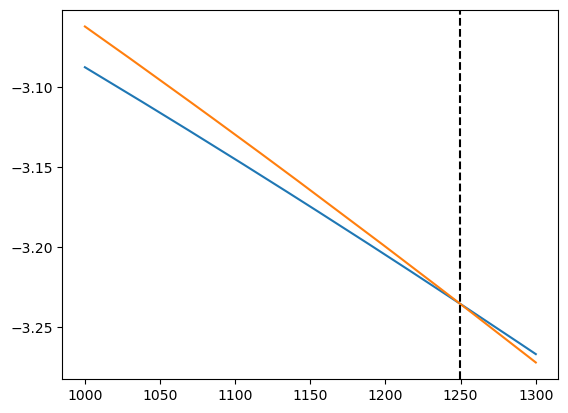

In [10]:
get_tm(pr['fcc_1000_70000/output/energy_free'],
      pr['lqd_1000_70000/output/energy_free'],
      pr['lqd_1000_70000/output/temperature'])